This notebook contains a few exercises on NumPy, Pandas and Scipy. 

Assigned readings:
* [A Visual Intro to NumPy and Data Representation](http://jalammar.github.io/visual-numpy) by Jay Alammar, **up to "Transposing and Reshaping**.
* [Pandas DataFrame introduction](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html)
* [Pandas read-write tutorial](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html)
* [Scipy introduction](https://docs.scipy.org/doc/scipy/tutorial/general.html)
* [Scipy IO tutorial](https://docs.scipy.org/doc/scipy/tutorial/io.html)

Exercises marked with **!** require information not found in the assigned readings. To solve them you will have to explore the online documentations:
* [NumPy](https://numpy.org/doc/stable/user/index.html)
* [Pandas](https://pandas.pydata.org/docs/user_guide/index.html)
* [Scipy](https://docs.scipy.org/doc/scipy/tutorial/index.html)

# Numpy

## Operations on 1D arrays

To practice with operations on 1D NumPy arrays, we will illustrate the law of large numbers. Before we start, we will import the NumPy module and fix the random seed used in the random number generator:

In [1]:
import numpy as np
np.random.seed(0)

**Exercise 1.1.1**

Create a 1D array of 50 random numbers drawn from the uniform distribution in [0,1]. Determine the minimum, maximum and mean value in the array.

In [2]:
rn = np.random.random(50)
rn

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215,
       0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443,
       0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194,
       0.26455561, 0.77423369, 0.45615033, 0.56843395, 0.0187898 ,
       0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 ,
       0.3595079 , 0.43703195, 0.6976312 , 0.06022547, 0.66676672,
       0.67063787, 0.21038256, 0.1289263 , 0.31542835, 0.36371077])

In [3]:
rn.max()

0.978618342232764

In [4]:
rn.min()

0.018789800436355142

In [5]:
rn.mean()

0.5379651182755409

**Exercise 1.1.2**

Create a Python list with 100 elements where element $i$ is the mean of an array of $i$ elements drawn from the uniform distribution in [0,1].

In [6]:
means = [np.random.random(n).mean() for n in range(1,101)]

Which one of the 5th, 50th and 100th element is closest to 0.5?

In [7]:
print(means[4], means[49], means[99])

0.2520879254607531 0.5306797514110339 0.47843320247041166


Assuming that the previous Python list is stored in a variable called `means`, its content can be plotted as follows:



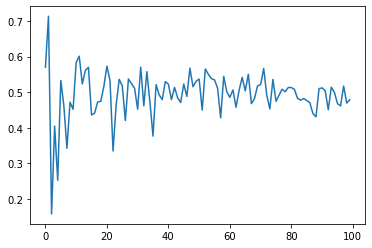

In [8]:
from matplotlib import pyplot as plt
plt.plot(means)

If all went well, the list should converge to 0.5!

## Operations on 2D arrays

We will practice operations on 2D NumPy arrays by manipulating 2D images. The Python Imaging Library (PIL) provides an easy way to load 2D images of various types in NumPy arrays. Here, we will practice with a PNG image representing the NumPy logo:

In [9]:
from PIL import Image
import os
image = np.array(Image.open(os.path.join('data','numpy.png')))

NumPy arrays representing images can easily be shown with Matplotlib:

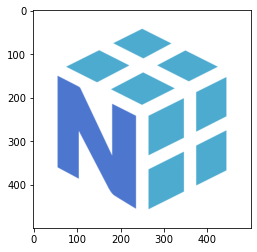

In [10]:
from matplotlib import pyplot as plt
plt.imshow(image)

**Exercise 1.2.1**

Determine the size of the image (number of pixels in x and y dimension).

In [11]:
image.shape

(500, 500, 4)

**Exercise 1.2.2**

Plot the bottom half of the image, i.e., the lines from x=250 on.

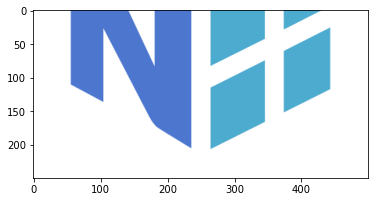

In [12]:
plt.imshow(image[250:,:,:])

**! Exercise 1.2.3**

Write a program to remove the whitespace around the image.

In [13]:
for i in range(image.shape[0]):
    if np.array_equal(image[i,:, 0], image[i,:,1]) and np.array_equal(image[i,:,1], image[i,:,2]):
        continue
    break
min_x = i - 1
for i in range(image.shape[0]-1, 0, -1):
    if np.array_equal(image[i,:, 0], image[i,:,1]) and np.array_equal(image[i,:,1], image[i,:,2]):
        continue
    break
max_x = i + 1
for i in range(image.shape[1]):
    if np.array_equal(image[:,i, 0], image[:,i,1]) and np.array_equal(image[:,i,1], image[:,i,2]):
        continue
    break
min_y = i - 1
for i in range(image.shape[1]-1, 0, -1):
    if np.array_equal(image[:,i, 0], image[:,i,1]) and np.array_equal(image[:,i,1], image[:,i,2]):
        continue
    break
max_y = i + 1

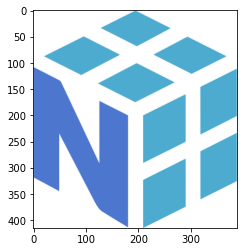

In [14]:
plt.imshow(image[min_x:max_x,min_y:max_y])

**! Exercise 1.2.4**

Using NumPy's `linalg` module, solve the equation **Ax** = **b**, where:

$$
\textbf{A}=
\begin{bmatrix}
8 & -6 & 2\\
-4 & 11 & -7\\
4 & -7 & 6
\end{bmatrix}
\quad
\mathrm{and} \quad \textbf{b} = \begin{bmatrix}
28\\
-40\\
33
\end{bmatrix}
$$

In [15]:
a = np.array([
    [8, -6, 2],
    [-4, 11, -7],
    [4, -7, 6]
])

b = np.array([28, -40, 33])

from numpy.linalg import solve
solve(a, b)

array([ 2., -1.,  3.])

Determine the inverse of **A**

In [16]:
from numpy.linalg import inv
inv(a)

array([[ 0.1328125,  0.171875 ,  0.15625  ],
       [-0.03125  ,  0.3125   ,  0.375    ],
       [-0.125    ,  0.25     ,  0.5      ]])

# Pandas

We will explore file `airbnb.csv`, a dataset of Airbnb prices in New York City. The dataset was exported from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data).

**Exercise 2.1**

Load the dataset in a Pandas data frame and show a sample of the data frame:

In [17]:
import pandas as pd
df = pd.read_csv(os.path.join('data', 'airbnb.csv'))
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Each row holds information for a given listing and columns represent the attributes of a listing.

**Exercise 2.2**

What is the highest price listed in the dataset?

In [18]:
df['price'].max()

10000

What is the total number of reviews contained in the dataset?

In [19]:
df['number_of_reviews'].sum()

1138005

What are the min, max, and mean of the following features?
* Price
* Number of reviewers
* Minimum nights

In [20]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Exercise 2.3**

How many listings have a price lower than $100?

In [21]:
len(df[df.price < 100])

21877

**Exercise 2.4**

What is the cheapest private room in Manhattan?

In [22]:
# cheapest private room in Manhattan

df[(df.neighbourhood_group == 'Manhattan') & (df.room_type=='Private room')].sort_values(by='price').head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
31407,24412104,Cozy feel at home studio,91034542,Maureen,Manhattan,Kips Bay,40.74408,-73.97803,Private room,10,5,42,2019-06-30,2.87,1,2


**! Exercise 2.5**

Among the numerical features (latitude, longitude, minimum nights, etc), which one is the most correlated to the listing price?

In [23]:
# Pandas has a function to compute the pairwise correlation of columns
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


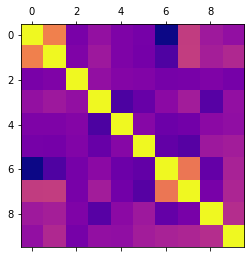

In [24]:
plt.matshow(df.corr(),cmap='plasma')

# Scipy


**Exercise 3.1**

A colleague of yours who uses MATLAB sent you data in the mat file `points.mat`. Load this file and retrieve the x and y arrays in it. Using matplotlib, plot the (x, y) points.

In [25]:
import scipy.io as sio
mat_file = sio.loadmat(os.path.join('data', 'points.mat'))
x = mat_file['x'][0]
y = mat_file['y'][0]
y

array([3.1, 2.4, 9.7, 1.2, 0.9, 1.4, 2.6, 5.3, 2.2, 8.1])

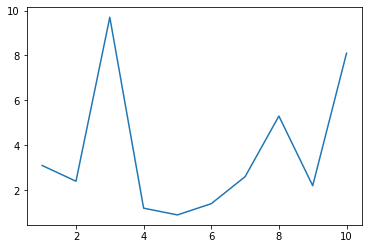

In [26]:
plt.plot(x, y)

**! Exercise 3.2**

Using Scipy's `interpolate` module, interpolate the datapoints using (1) nearest neighbors, and (2) cubic splines. Plot the interpolants.

In [27]:
from scipy.interpolate import interp1d
fcubic = interp1d(x, y, kind='cubic')
fnear = interp1d(x, y, kind='nearest')

xnew = np.linspace(1, 10, num=50, endpoint=True)

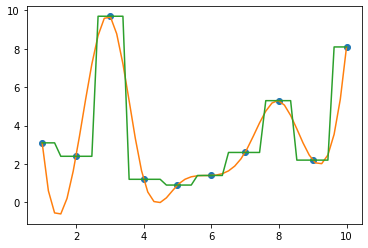

In [28]:
plt.plot(x, y, 'o', xnew, fcubic(xnew), xnew, fnear(xnew))

**! Exercise 3.3**

Using Scipy's `integrate` module, determine the integral (area under the curve) of the interpolants between 1 and 10.

In [29]:
# area under the curve
import scipy.integrate as integrate
integrate.quad(fnear, 1, 10)

<ipython-input-29-ebb0f856421e>:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrate.quad(fnear, 1, 10)


(31.30825803041668, 0.23541001359585678)

In [30]:
integrate.quad(fcubic, 1, 10)

(28.36936620204714, 3.6113703836491304e-07)